PROCESAMIENTO DEL LENGUAJE NATURAL PLN
Primero tenemos que instalar NLTK con: conda install nltk

In [107]:
#Lo importamos para ver que se ha instalado correctamente
import nltk

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
mensaje = [line.rstrip() for line in open('spam.csv')]

In [110]:
mensaje[0]

'v1,v2,,,'

In [111]:
mensaje[1]

'ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,'

In [112]:
#Para saber la longitud:
print(len(mensaje))

5575


In [113]:
# Si queremos mostrar los 5 primeros mensajes por ejemplo:
for mensaje in enumerate(mensaje[:10]):
    print(mensaje)

(0, 'v1,v2,,,')
(1, 'ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,')
(2, 'ham,Ok lar... Joking wif u oni...,,,')
(3, "spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,")
(4, 'ham,U dun say so early hor... U c already then say...,,,')
(5, 'ham,"Nah I don\'t think he goes to usf, he lives around here though",,,')
(6, 'spam,"FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",,,')
(7, 'ham,Even my brother is not like to speak with me. They treat me like aids patent.,,,')
(8, "ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,")
(9, 'spam,WINNER!! As a valued network customer you have been 

In [130]:
# Con pandas convertimos estos datos en un dataframe
mensajedf = pd.read_csv('spam.csv', sep=',', encoding="ISO-8859-1", on_bad_lines='skip')


In [131]:
mensajedf

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [132]:
mensajedf = mensajedf.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

In [134]:
mensajedf.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [135]:
# Creamos una nueva columna que recogerá la longitud de los mensajes
mensajedf['longitud'] = mensajedf['v2'].apply(len)

In [136]:
mensajedf.head()

,v1,v2,longitud
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: ylabel='Frequency'>

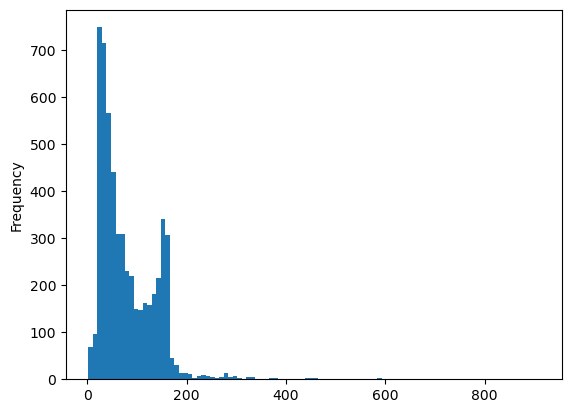

In [137]:
# Vamos a ver la longitud en funcion del tipo de mensaje
# Creamos un histograma con el campo de longitud
mensajedf['longitud'].plot.hist(bins=100)

In [138]:
#Nos hace una estadística de la columna longitud
mensajedf['longitud'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: longitud, dtype: float64

In [139]:
# Si queremos saber que mensaje tiene una longitud 910 (el maximo)
mensajedf[mensajedf['longitud']==910]['v2']

1084    For me the love should start with attraction.i...
Name: v2, dtype: object

In [140]:
# Para ver el mensaje completo
mensajedf[mensajedf['longitud']==910]['v2'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

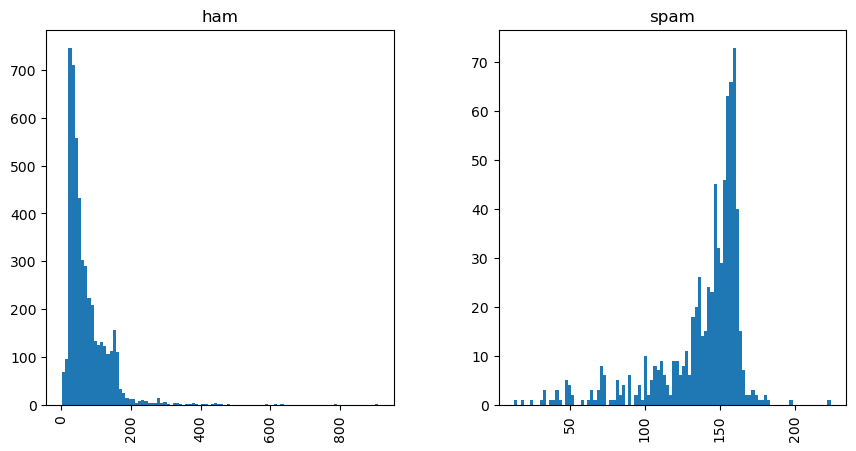

In [141]:
#Podedmos hacer un histograma comparando la longitud segun el tipo de mensaje
mensajedf.hist(column='longitud', by='v1', bins=100, figsize=(10,5))

PROCESAMIENTO DE TEXTOS

In [158]:
#Vamos a crear una función para procesar los distintos textos
import string

In [159]:
#Vamos a ver primero un ejemplo
ejemplo = 'Mensaje de ejemplo! Nota: Esta nota tiene signos de puntuación'
ejemplo

'Mensaje de ejemplo! Nota: Esta nota tiene signos de puntuación'

In [160]:
# Primero eliminamos los signos de puntuación
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [161]:
sinpuntuacion = [c for c in ejemplo if c not in string.punctuation]

In [162]:
sinpuntuacion

['M',
 'e',
 'n',
 's',
 'a',
 'j',
 'e',
 ' ',
 'd',
 'e',
 ' ',
 'e',
 'j',
 'e',
 'm',
 'p',
 'l',
 'o',
 ' ',
 'N',
 'o',
 't',
 'a',
 ' ',
 'E',
 's',
 't',
 'a',
 ' ',
 'n',
 'o',
 't',
 'a',
 ' ',
 't',
 'i',
 'e',
 'n',
 'e',
 ' ',
 's',
 'i',
 'g',
 'n',
 'o',
 's',
 ' ',
 'd',
 'e',
 ' ',
 'p',
 'u',
 'n',
 't',
 'u',
 'a',
 'c',
 'i',
 'ó',
 'n']

In [163]:
sinpuntuacion = ''.join(sinpuntuacion)

In [164]:
sinpuntuacion

'Mensaje de ejemplo Nota Esta nota tiene signos de puntuación'

In [165]:
#Ahora vamos a eliminar las palabras que no son útiles en nuestra cadena
from nltk.corpus import stopwords

In [166]:
stopwords.words("spanish")

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [167]:
palabras = sinpuntuacion.split()

In [169]:
ejemplo_limpio = [palabra for palabra in palabras if palabra.lower() not in stopwords.words("spanish")]

In [170]:
print(ejemplo_limpio)

['Mensaje', 'ejemplo', 'Nota', 'nota', 'signos', 'puntuación']


In [171]:
# Ahora creamos la función procesartexto para procesar estos datos
def procesar_texto(cadena):
    sinpuntuacion = [c for c in cadena if c not in string.punctuation]
    sinpuntuacion = ''.join(sinpuntuacion)
    palabras = sinpuntuacion.split()
    cadena_limpia = [palabra for palabra in palabras if palabra.lower() not in stopwords.words("spanish")]
    return cadena_limpia

In [174]:
cadena = 'Mensaje de ejemplo! Nota: Esta nota tiene signos de puntuación'
resultado = procesar_texto(cadena)

In [175]:
print (resultado)

['Mensaje', 'ejemplo', 'Nota', 'nota', 'signos', 'puntuación']


In [ ]:
#hora vamos a aplicar esta función a nuestros mensajes

In [177]:
mensajedf.head()

,v1,v2,longitud
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [178]:
mensajedf['v2'].head(5).apply(procesar_texto)

0    [Go, until, jurong, point, crazy, Available, o...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, in, 2, wkly, comp, to, win, FA, ...
3    [U, dun, say, so, early, hor, U, c, already, t...
4    [Nah, I, dont, think, goes, to, usf, lives, ar...
Name: v2, dtype: object

In [179]:
# Hemos obtenido las palabras clave de cada sms. El siguiente paso sería vectorizar, es decir, conseguir una matriz donde por un lado en las filas 
# tengamos las palabras que forman nuestro diccionario de mens. y por otro lado los mensajes. Entonces por cada mensaje tendríamos si esa palabra está
# incluida o no en el mensaje
from sklearn.feature_extraction.text import CountVectorizer

In [180]:
# Creamos una vble transformador que es la q va a transformar nuestros mensajes o va a construir la matriz de vectorización
transformador = CountVectorizer(analyzer = procesar_texto).fit(mensajedf['v2'])

In [181]:
#Imprimimos todas las palabras que forman parte de este vocabulario. A cada palabra importante le ha asignado un nº. Luego este nº por cada una de 
# las frases tendremos un vestor o lista de elementos donde nos dirá si aparece o no en esa frase
print (transformador.vocabulary_)

{'Go': 2070, 'until': 10891, 'jurong': 7667, 'point': 9036, 'crazy': 5871, 'Available': 1116, 'only': 8708, 'in': 7438, 'bugis': 5319, 'n': 8446, 'great': 7039, 'world': 11308, 'buffet': 5318, 'Cine': 1496, 'there': 10545, 'got': 7008, 'amore': 4744, 'wat': 11097, 'Ok': 3104, 'lar': 7811, 'Joking': 2477, 'wif': 11214, 'u': 10829, 'oni': 8703, 'Free': 1951, 'entry': 6434, '2': 422, 'wkly': 11267, 'comp': 5721, 'to': 10651, 'win': 11227, 'FA': 1847, 'Cup': 1564, 'final': 6660, 'tkts': 10644, '21st': 442, 'May': 2829, '2005': 429, 'Text': 4001, '87121': 860, 'receive': 9371, 'questionstd': 9277, 'txt': 10817, 'rateTCs': 9318, 'apply': 4825, '08452810075over18s': 73, 'U': 4126, 'dun': 6309, 'say': 9675, 'so': 10013, 'early': 6328, 'hor': 7293, 'c': 5364, 'already': 4720, 'then': 10541, 'Nah': 2977, 'I': 2309, 'dont': 6228, 'think': 10563, 'goes': 6979, 'usf': 10930, 'lives': 7951, 'around': 4872, 'here': 7203, 'though': 10582, 'FreeMsg': 1953, 'Hey': 2237, 'darling': 5967, 'its': 7572, 'be

In [182]:
# Vamos a ver un ejemplo
mensaje3 = mensajedf['v2'][3]

In [183]:
mensaje3

'U dun say so early hor... U c already then say...'

In [184]:
mensaje3_transformado = transformador.transform([mensaje3])

In [186]:
print(mensaje3_transformado)

  (0, 4126)	2
  (0, 4720)	1
  (0, 5364)	1
  (0, 6309)	1
  (0, 6328)	1
  (0, 7293)	1
  (0, 9675)	2
  (0, 10013)	1
  (0, 10541)	1


In [189]:
# Para saber cualk es x ejemplo, la palabra 4126
transformador.get_feature_names_out()[4720]

'already'

In [190]:
#Lo que hacemos es transformar todos los sms en un formato del tipo de la matriz que acabamos de ver dnd podemos saber cuantas veces vienen las palabras
# de nuestro diccionario dentro de ese sms

PREDICCIONES

In [191]:
# Primero importamos los módulos necesarios
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [192]:
m_ent, m_pru, e_ent, e_pru = train_test_split(mensajedf['v2'], mensajedf['v1'], test_size=0.3)

In [195]:
#  Ahora hacemos un pipeline, es decir, vamos a crear los distintos pasos por los que tienen que pasar nuestros mensajes para
# poder luego entrenar el modelo
pipeline = Pipeline([
    ('vectorizar', CountVectorizer(analyzer=procesar_texto)),
    ('transformar', TfidfTransformer()),
    ('clasificar', RandomForestClassifier())
    ])

In [198]:
# Ahora entrenamos nuestro pipline
pipeline.fit(m_ent,e_ent)

Pipeline(steps=[('vectorizar',
                 CountVectorizer(analyzer=<function procesar_texto at 0x000001D10722C9A0>)),
                ('transformar', TfidfTransformer()),
                ('clasificar', RandomForestClassifier())])

In [199]:
predicciones = pipeline.predict(m_pru)

In [200]:
predicciones

array(['spam', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype=object)

In [202]:
print (classification_report(e_pru, predicciones))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1459
        spam       1.00      0.77      0.87       213

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.93      1672
weighted avg       0.97      0.97      0.97      1672

